# Pandas
Импортируйте: pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузите датасет Tips из набора датасетов seaborn

In [14]:
tips_data = sns.load_dataset("tips")

In [30]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   smoker_bin_V_1  244 non-null    category
 8   smoker_bin_V_2  244 non-null    category
dtypes: category(6), float64(2), int64(1)
memory usage: 8.1 KB


Посмотрите на первые 5 строчек

In [4]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Узнайте сколько всего строчек и колонок в данных

In [5]:
tips_data.shape

(244, 7)

Проверьте есть ли пропуски в данных

In [ ]:
tips_data.isna().sum()

Посмотрите на распределение числовых признаков

In [7]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Найдите максимальное значение 'total_bill'

In [8]:
tips_data['total_bill'].max()

50.81

Найдите количество курящих людей

In [9]:
tips_data.query('smoker == "Yes"').smoker.count()

93

Узнайте какой средний 'total_bill' в зависимости от 'day'

In [10]:
tips_data.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [11]:
tips_data.query('total_bill > total_bill.median()').groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [15]:
tips_data['smoker_bin_V_1'] = tips_data['smoker'].apply(lambda i: 1 if i == 'Yes' else 0)   # способ через лямбду
tips_data['smoker_bin_V_2'] = tips_data['smoker'].map({'Yes': 1, 'No': 0})  # альтернативно через map()

In [16]:
tips_data

,total_bill,tip,sex,smoker,day,time,size,smoker_bin_V_1,smoker_bin_V_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0


# Visualization
Постройте гистограмму распределения признака 'total_bill'

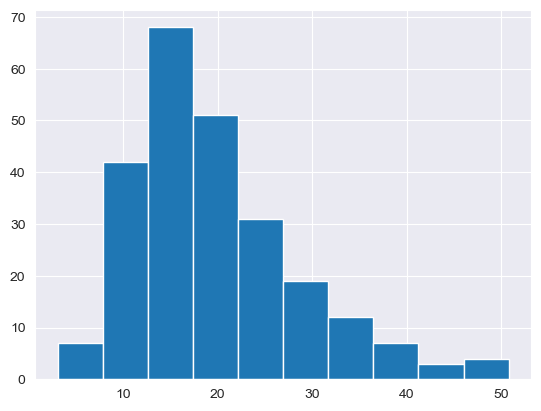

In [26]:
hiss = tips_data['total_bill'].hist()

Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

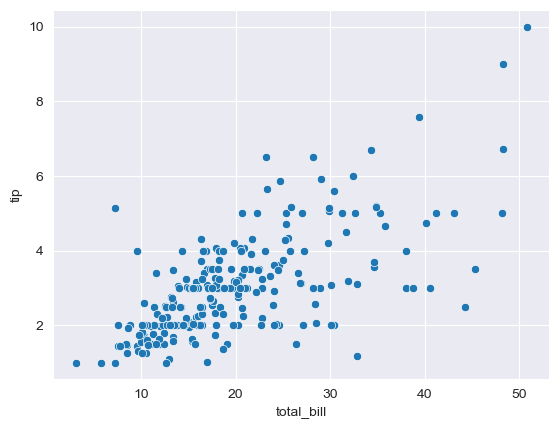

In [27]:
sc = sns.scatterplot(data=tips_data, x='total_bill', y='tip')
plt.show()

Постройте pairplot

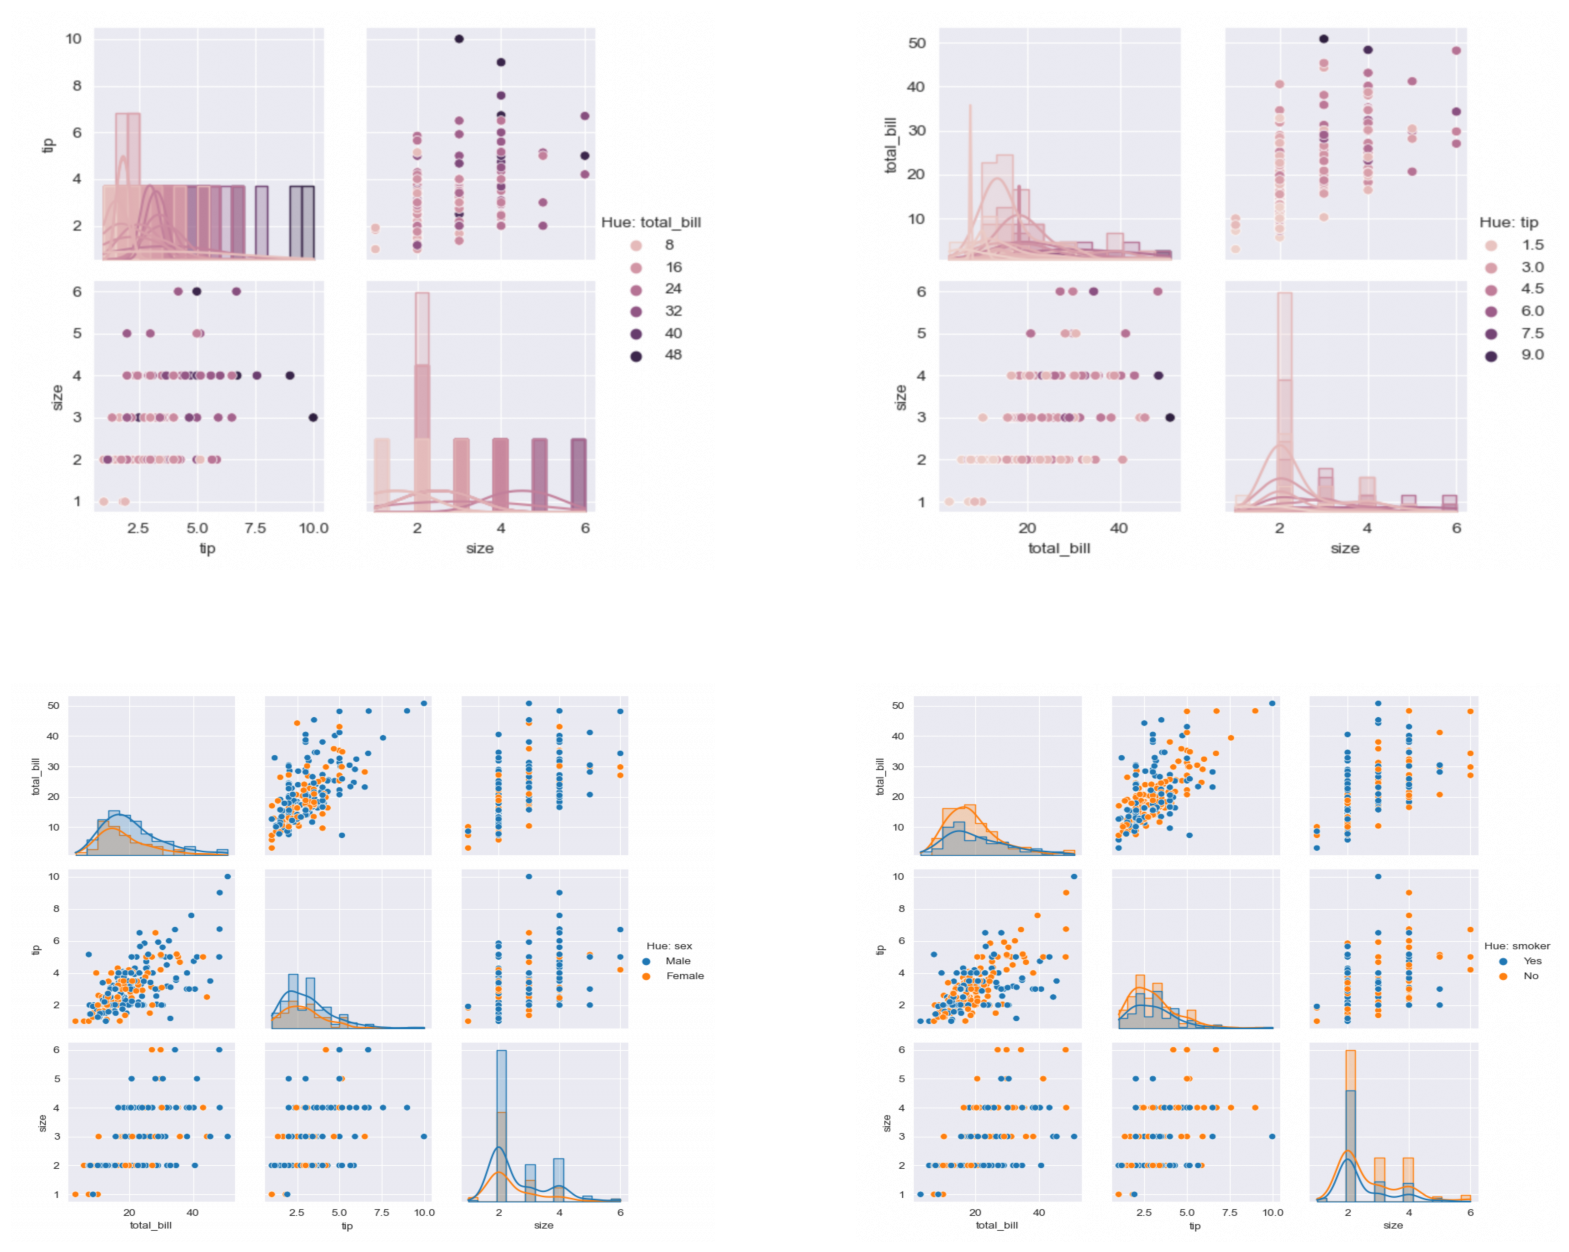

In [48]:
from matplotlib.image import BboxImage

# Функция для сохранения графика в виде изображения
def save_pairplot_as_image(hue):
    g = sns.PairGrid(tips_data, hue=hue)
    g.map_diag(sns.histplot, element='step', kde=True)
    g.map_offdiag(sns.scatterplot)
    g.add_legend(title=f'Hue: {hue}')
    g.fig.canvas.draw()
    img = g.fig.canvas.renderer.buffer_rgba()
    plt.close(g.fig)
    return img

# Сохранение каждого графика как изображение
img1 = save_pairplot_as_image('total_bill')
img2 = save_pairplot_as_image('tip')
img3 = save_pairplot_as_image('sex')
img4 = save_pairplot_as_image('smoker')

fig, axes = plt.subplots(2, 2, figsize=(20, 16)) # Создание сетки графиков

# Функция для отображения изображения на указанной оси
def display_image_on_axis(ax, img):
    bbox_image = BboxImage(ax.bbox, interpolation='bicubic', zorder=-1)
    bbox_image.set_data(img)
    ax.add_artist(bbox_image)
    ax.set_xticks([])
    ax.set_yticks([])

# Отображение графиков на сетке
display_image_on_axis(axes[0, 0], img1)
display_image_on_axis(axes[0, 1], img2)
display_image_on_axis(axes[1, 0], img3)
display_image_on_axis(axes[1, 1], img4)

plt.show()

Постройте график взаимосвязи между признаками 'total_bill' и 'day'

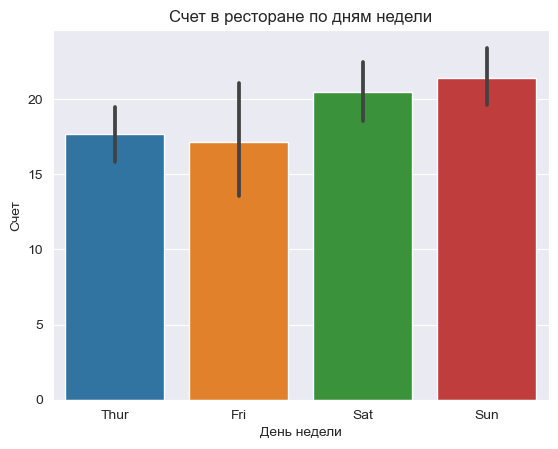

In [52]:
gr = sns.barplot(y=tips_data.total_bill, x=tips_data['day'].values, data=tips_data)
gr.set(title="Счет в ресторане по дням недели")
gr.set(xlabel="День недели", ylabel="Счет")
plt.show()

Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

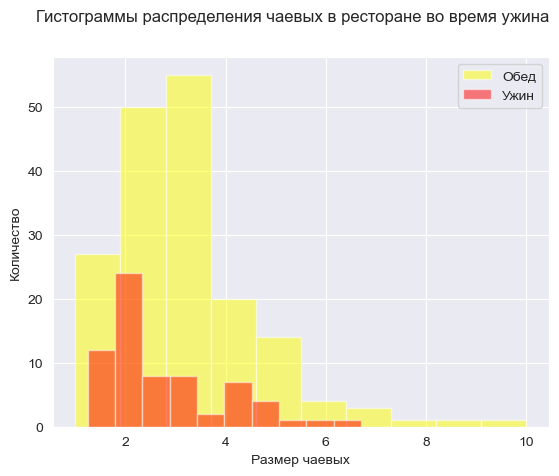

In [64]:
hiss1 = tips_data.query('time == "Dinner"').tip.hist(color='yellow', alpha=0.5, label='Обед')
hist1 = hiss1.get_figure()

hiss2 = tips_data.query('time == "Lunch"').tip.hist(color='red', alpha=0.5, label='Ужин')
hist2 = hiss2.get_figure()
hist2.suptitle("Гистограммы распределения чаевых в ресторане")
hiss2.set_xlabel("Размер чаевых")
hiss2.set_ylabel("Количество")
plt.legend()
plt.show()

#мне кажется, что такой график нагляднее демонстрирует распределение
# gr = sns.distplot(tips_data.query('time == "Dinner"').tip, kde=False, color='red')
# gr = sns.distplot(tips_data.query('time == "Lunch"').tip, kde=False, color='green')
# plt.show()

Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

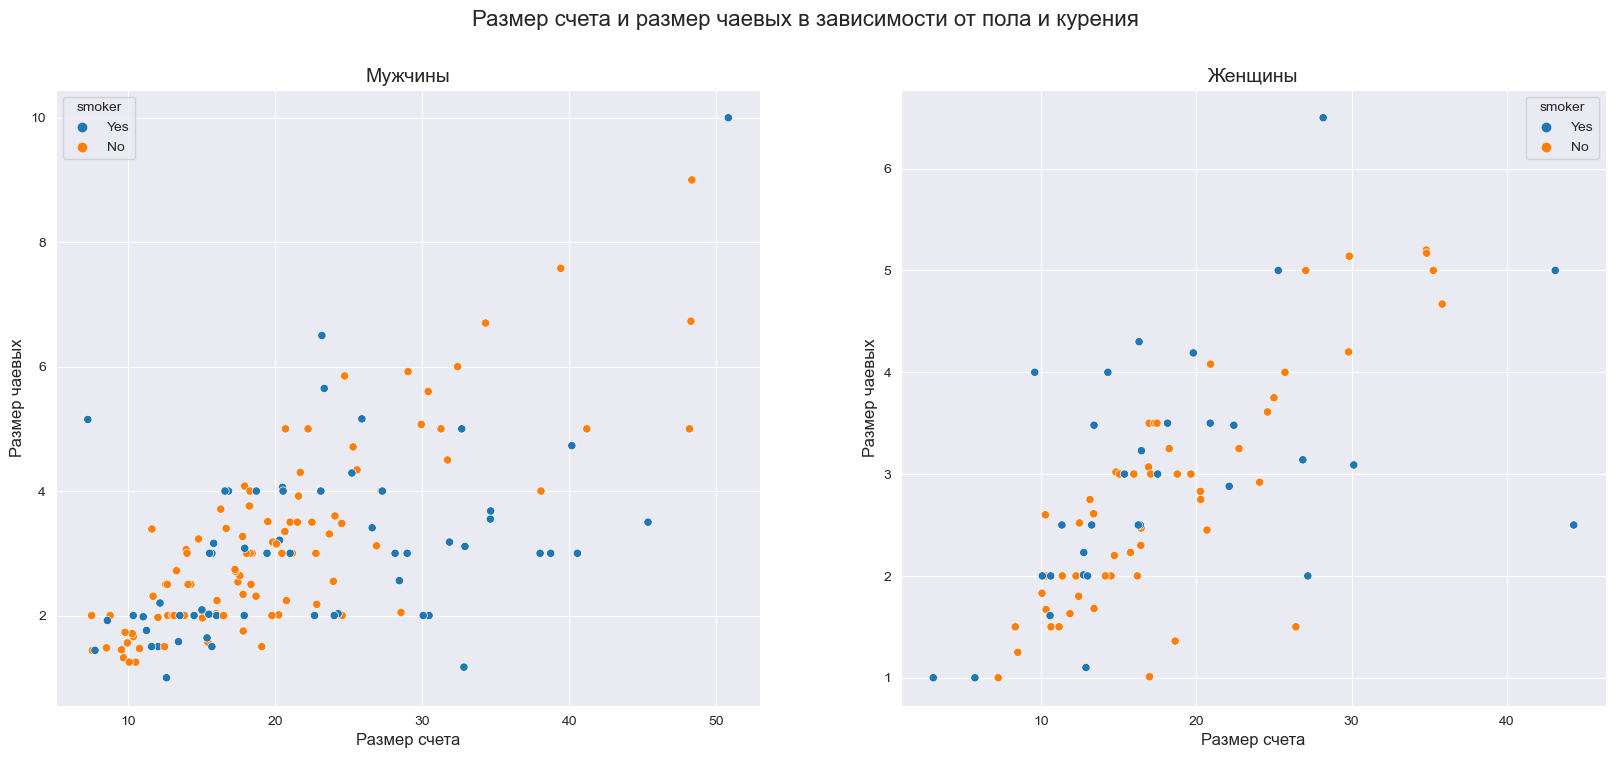

In [78]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
sc1 = sns.scatterplot(data=tips_data.query('sex == "Male"'), x='total_bill', y='tip', hue='smoker')
ax1.set_title('Мужчины', fontsize=14)
ax1.set_xlabel('Размер счета', fontsize=12)
ax1.set_ylabel('Размер чаевых', fontsize=12)

ax2 = plt.subplot(1, 2, 2)
sc2 = sns.scatterplot(data=tips_data.query('sex == "Female"'), x='total_bill', y='tip', hue='smoker')
ax2.set_title('Женщины', fontsize=14)
ax2.set_xlabel('Размер счета', fontsize=12)
ax2.set_ylabel('Размер чаевых', fontsize=12)

plt.suptitle("Размер счета и размер чаевых в зависимости от пола и курения", fontsize=16)

plt.show()

По желанию можете продолжить анализ данных и также отразить это в выводах.

In [79]:
tips_data

,total_bill,tip,sex,smoker,day,time,size,smoker_bin_V_1,smoker_bin_V_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0


In [80]:
tips_data['sex_bin_V_1'] = tips_data['sex'].map({'Female': 0, 'Male': 1})

Последующий анализ буду проводит на копии датасета

In [82]:
tips_data_df = tips_data[['total_bill', 'tip', 'sex_bin_V_1', 'smoker_bin_V_1', 'day', 'time', 'size']].copy()

In [83]:
tips_data_df

,total_bill,tip,sex_bin_V_1,smoker_bin_V_1,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3
240,27.18,2.00,0,1,Sat,Dinner,2
241,22.67,2.00,1,1,Sat,Dinner,2
242,17.82,1.75,1,0,Sat,Dinner,2


In [86]:
tips_data_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [87]:
tips_data_df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [88]:
tips_data_df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [109]:
tips_data_df['smoker_bin_V_1'].value_counts()

0    151
1     93
Name: smoker_bin_V_1, dtype: int64

In [94]:
tips_data_df['tip_procent_from_bill'] = round(tips_data_df['tip'] / tips_data_df['total_bill'] * 100, 2)

In [96]:
tips_data_df['time'] = tips_data_df['time'].map({'Dinner': 0, 'Lunch': 1})

In [ ]:
day_dummy = pd.get_dummies(tips_data_df['day'], prefix='day')
tips_data_df = pd.concat([tips_data_df, day_dummy], axis=1)

In [104]:
tips_data_df = tips_data_df.drop(['day_Fri','day'] ,axis=1)

In [126]:
tips_data_df

,total_bill,tip,sex_bin_V_1,smoker_bin_V_1,time,size,tip_procent_from_bill,day_Thur,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,5.94,0,0,1
1,10.34,1.66,1,0,0,3,16.05,0,0,1
2,21.01,3.50,1,0,0,3,16.66,0,0,1
3,23.68,3.31,1,0,0,2,13.98,0,0,1
4,24.59,3.61,0,0,0,4,14.68,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,3,20.39,0,1,0
240,27.18,2.00,0,1,0,2,7.36,0,1,0
241,22.67,2.00,1,1,0,2,8.82,0,1,0
242,17.82,1.75,1,0,0,2,9.82,0,1,0


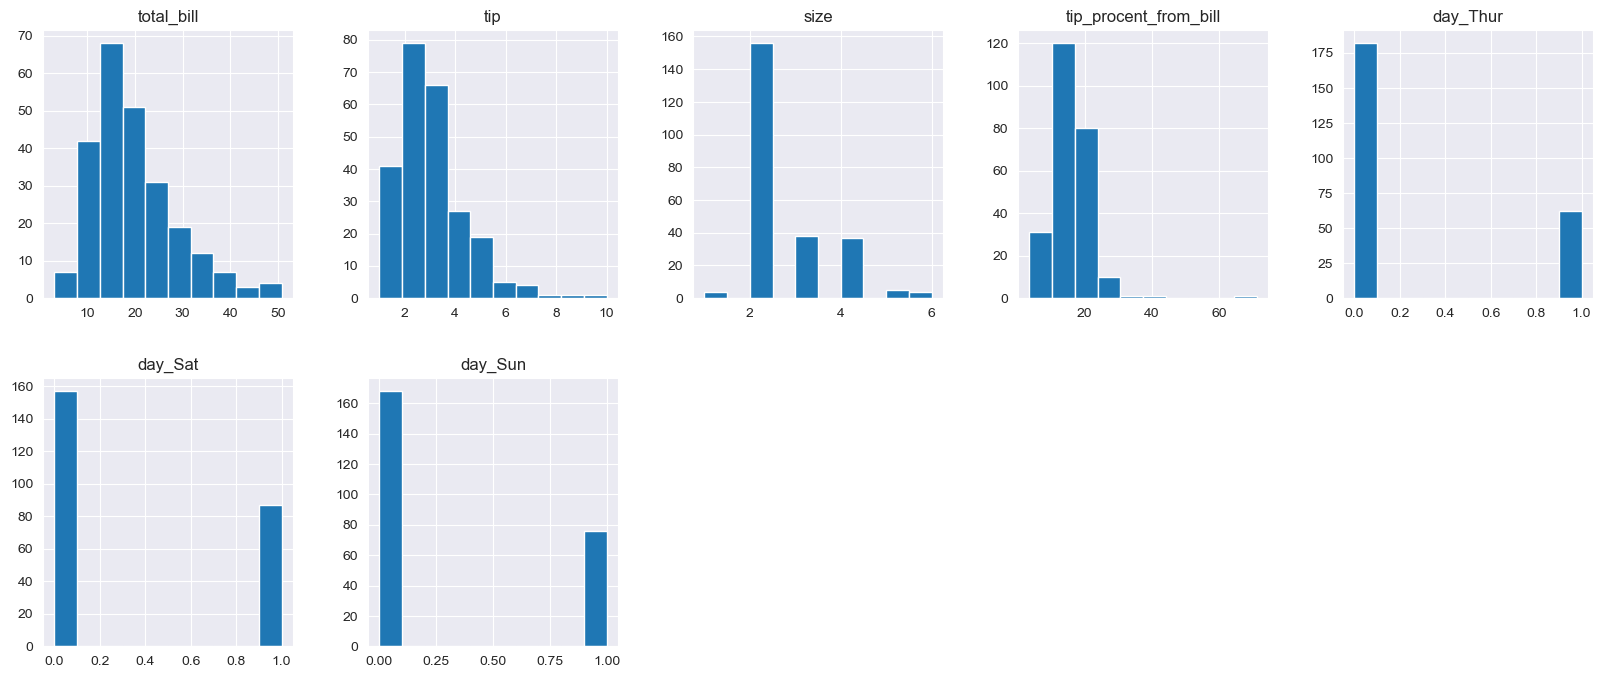

In [128]:
tips_data_df.hist(figsize=(20, 8), layout=(-1, 5));

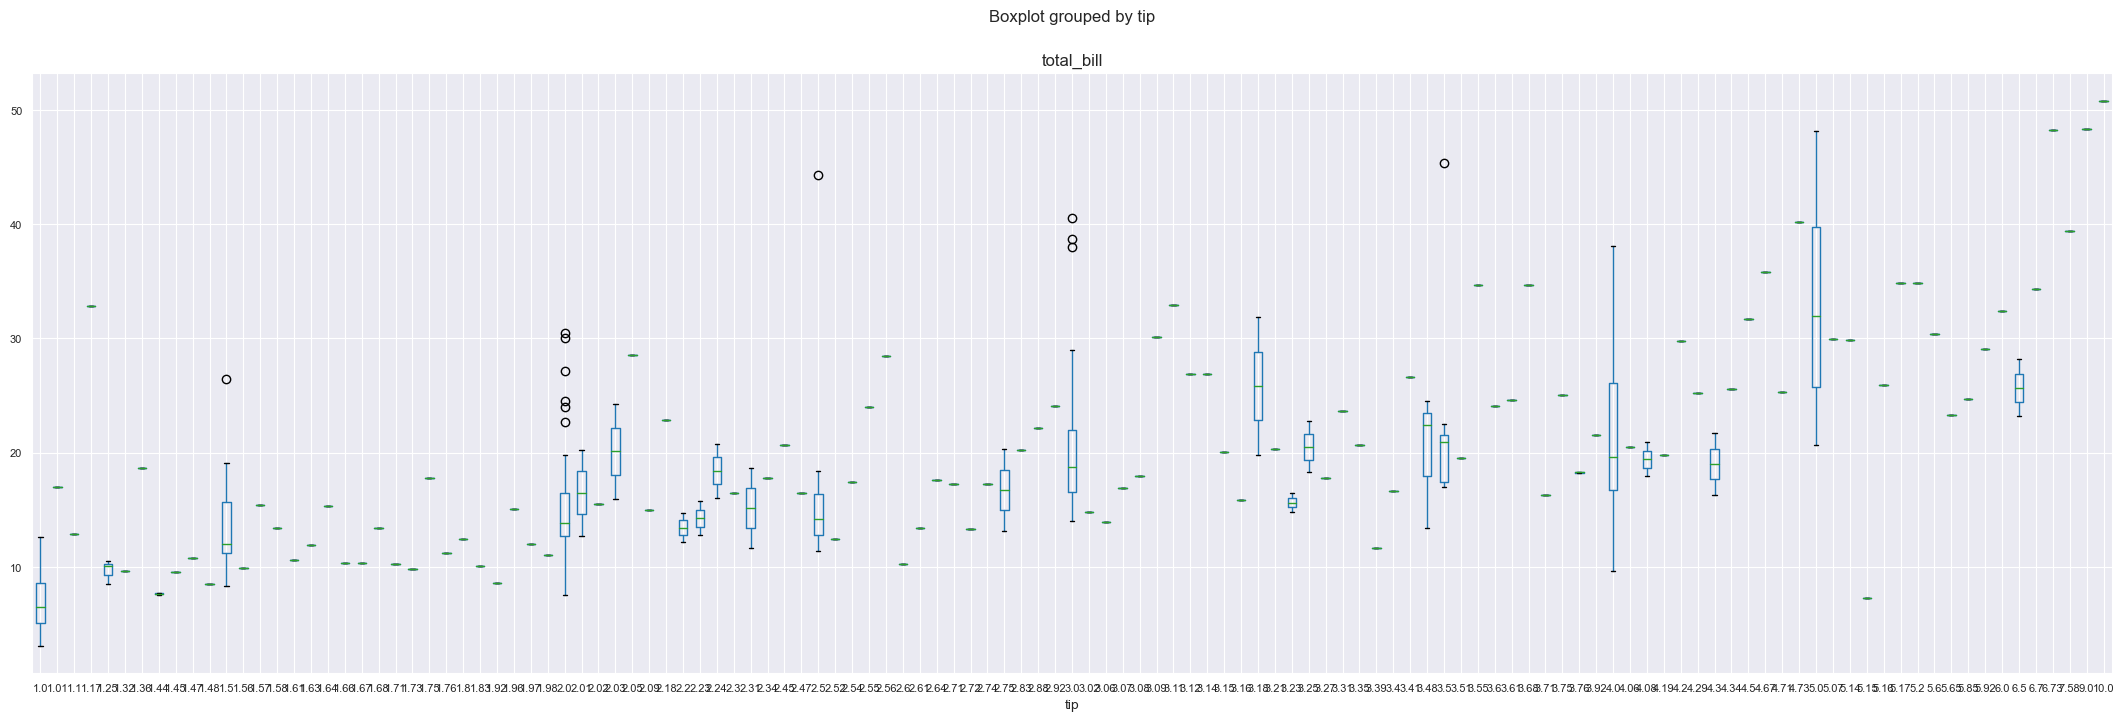

In [131]:
tips_data_df.boxplot(
    column=["total_bill"], by="tip", fontsize=8, figsize=(26, 8)
);

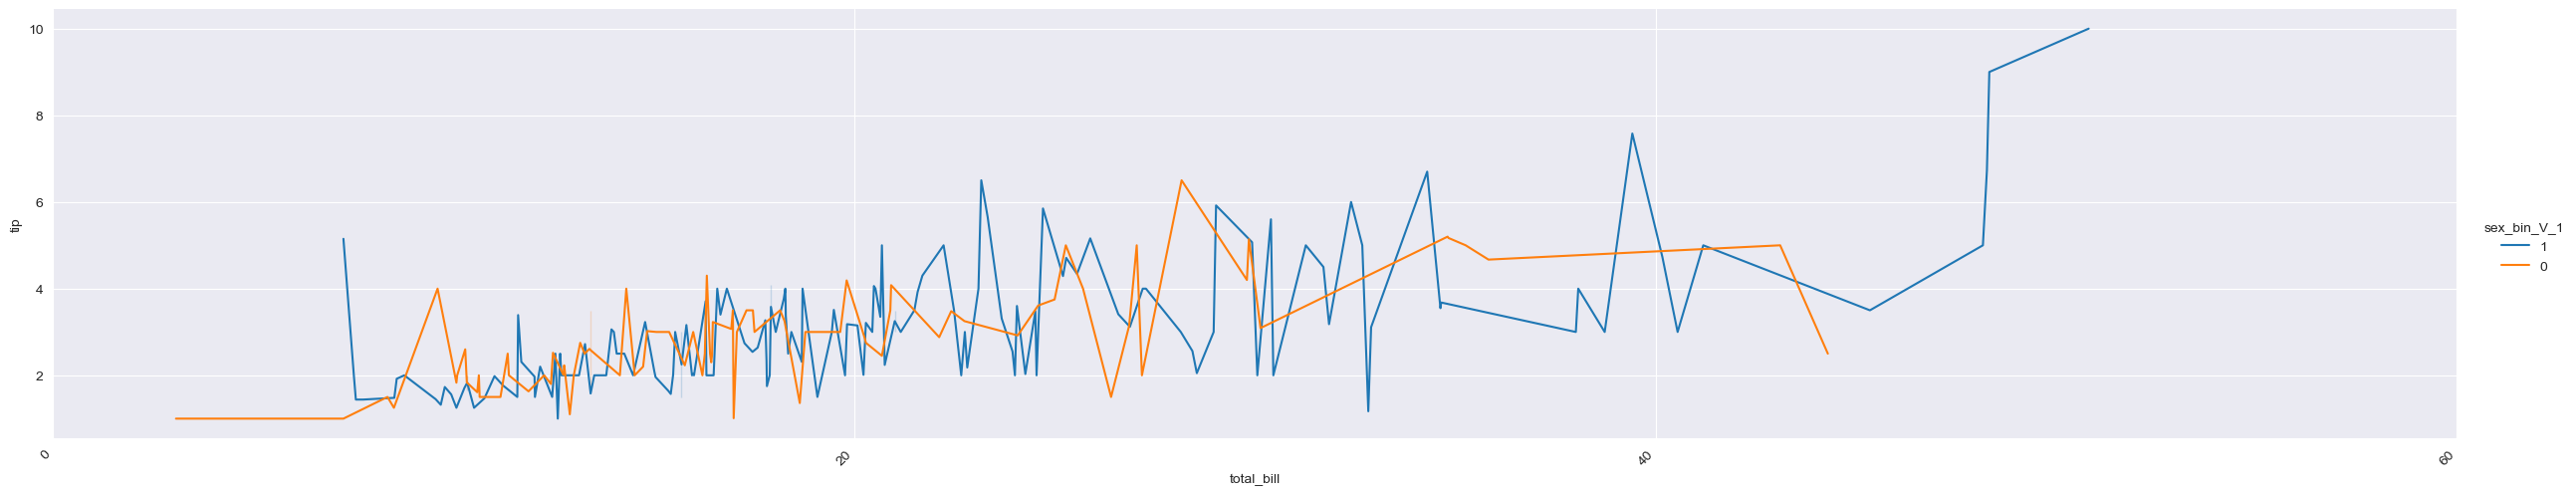

In [144]:
g = sns.relplot(
    data=tips_data_df,
    x="total_bill",
    y="tip",
    hue="sex_bin_V_1",
    kind="line",  # или scatter
    aspect=5,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

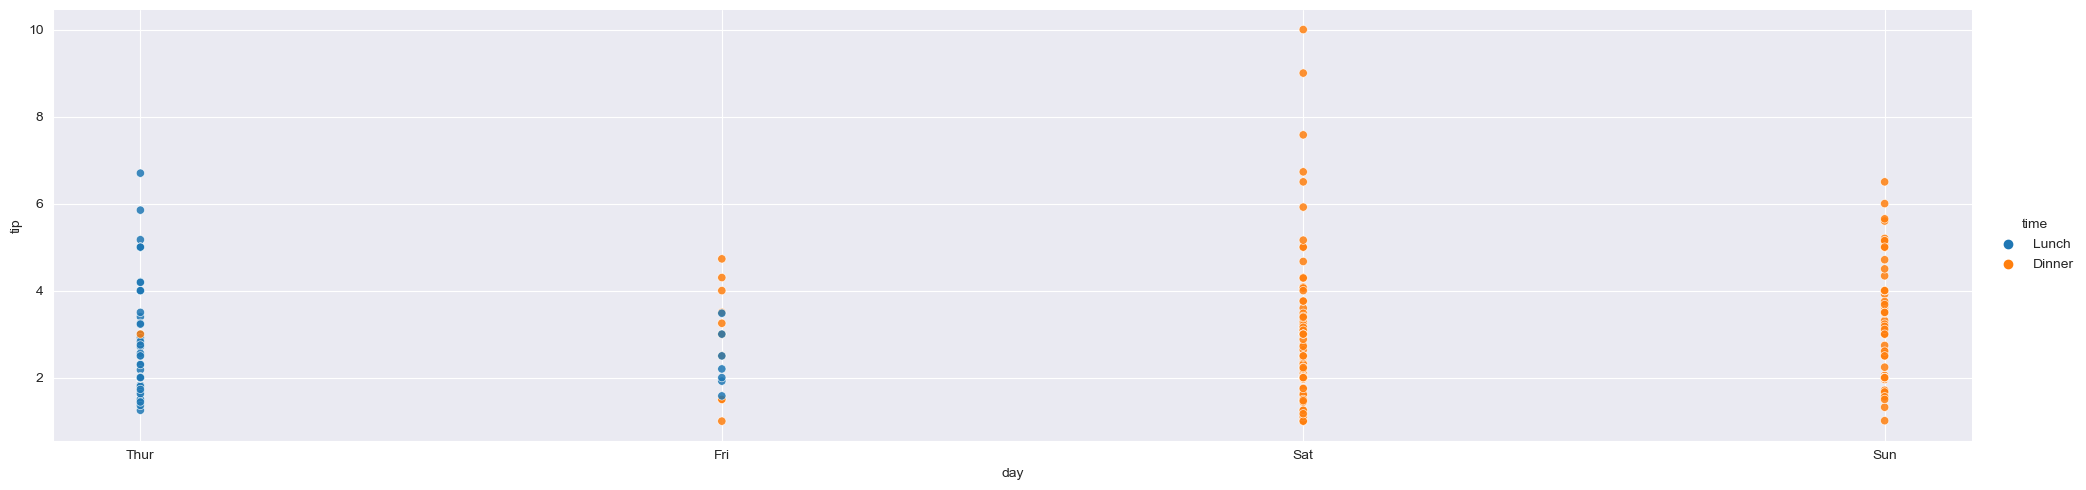

In [148]:
g = sns.relplot(
    data=tips_data,
    x="day",
    y="tip",
    hue="time",
    kind="scatter",
    aspect=4,
    alpha=0.85,
);

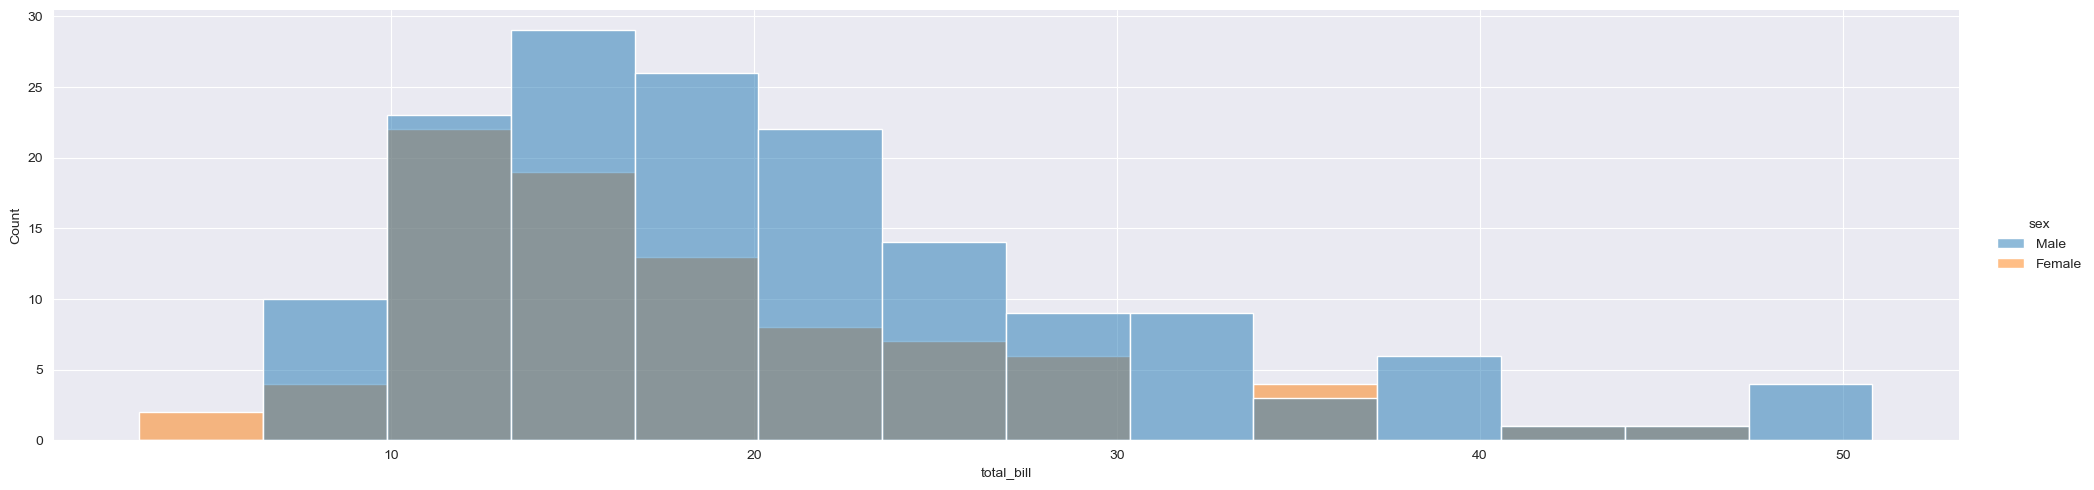

In [152]:
tmp = tips_data[tips_data["tip"].isin(tips_data.sample(200).tip.unique()[:])]

g = sns.displot(
    data=tips_data,
    x="total_bill",
    hue="sex",
    legend=True,
    aspect=4,
    kind="hist",  # kde
    alpha=0.5,
);

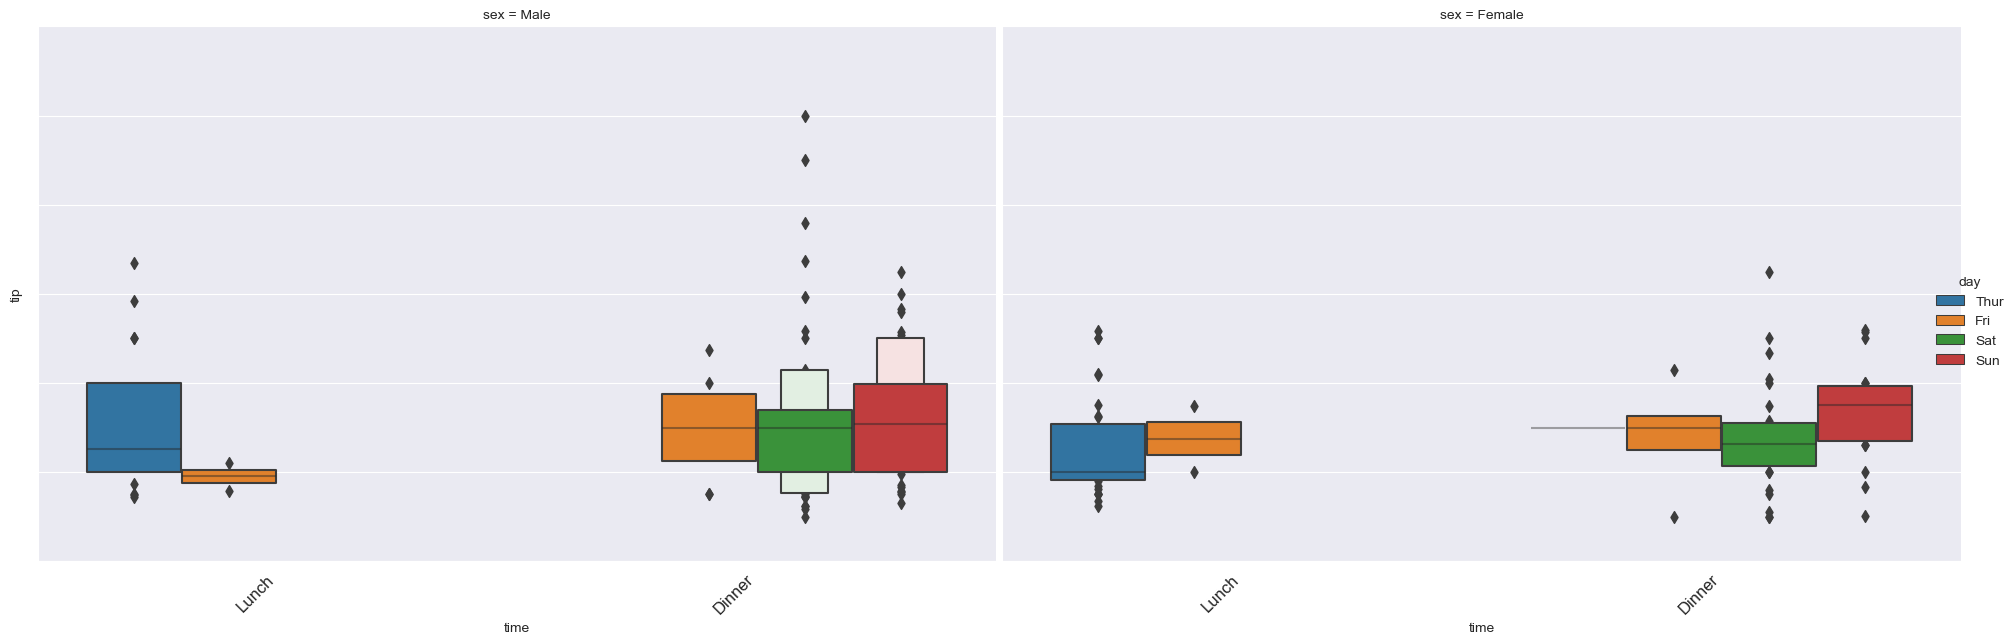

In [193]:
g = sns.catplot(
    data=tips_data,
    x="time",
    y="tip",
    hue="day",
    col="sex",  # Добавление разделения по полу
    height=8,  # Изменение высоты графиков
    aspect=3,  # Устанавливаем соотношение сторон
    kind="boxen",
)
g.set_xticklabels(rotation=45, horizontalalignment="right", fontsize=12)
g.set_yticklabels(rotation=45, horizontalalignment="right", fontsize=12)

plt.gcf().set_size_inches(20, 6)
plt.show()

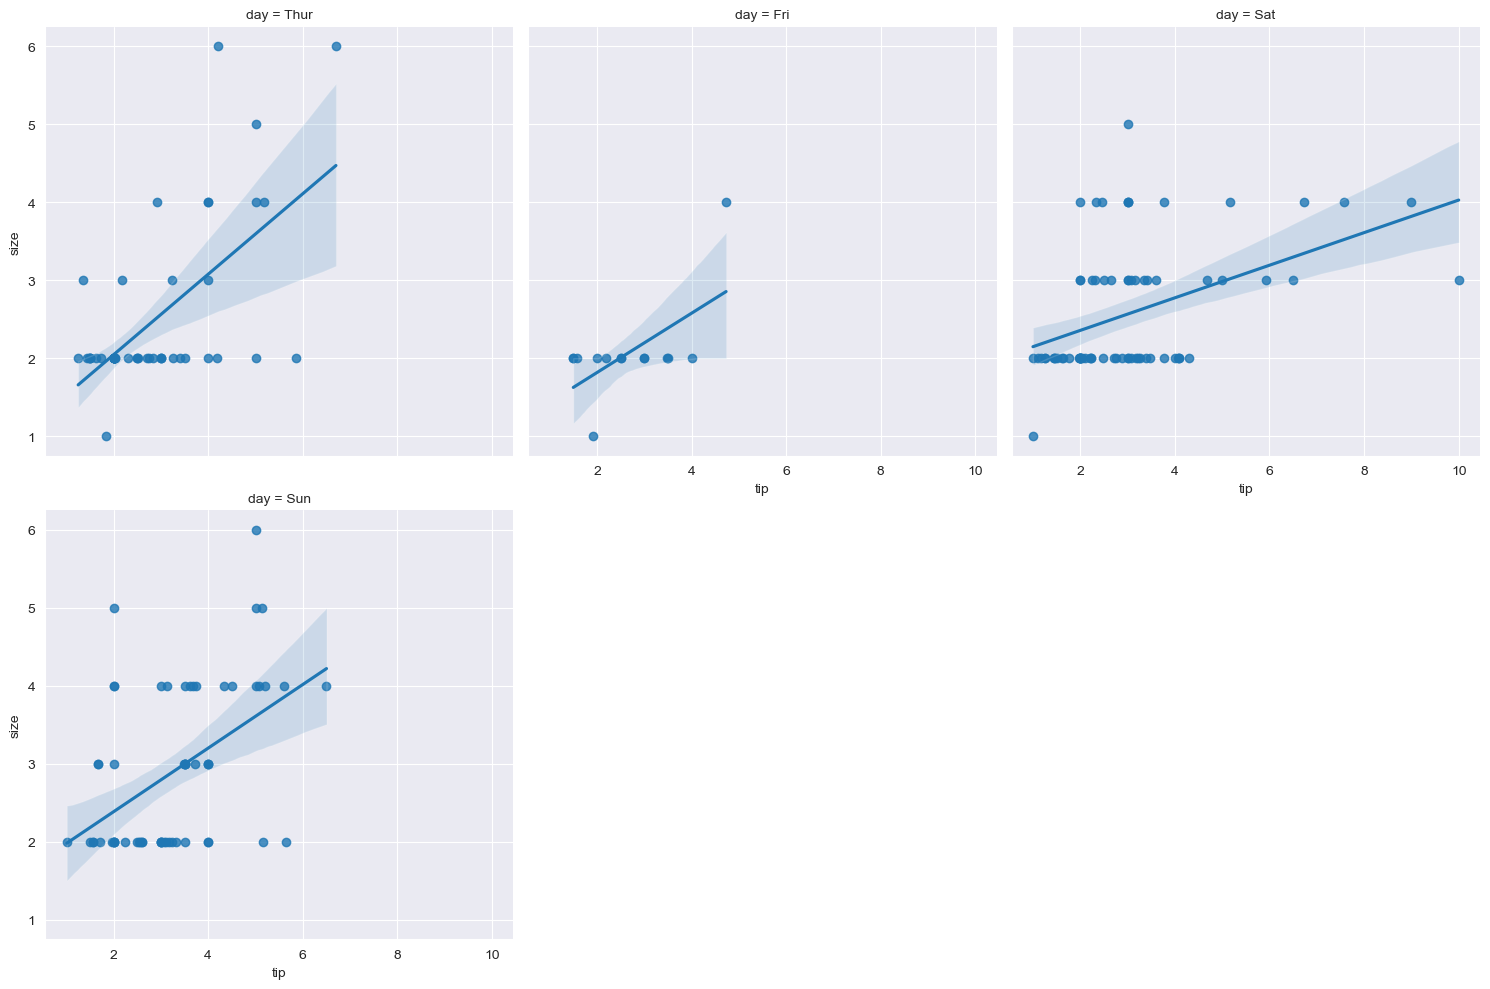

In [168]:
sns.lmplot(
    data=tips_data.sample(200),
    x="tip",
    y="size",
    col="day",
    col_wrap=3,
);

In [110]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['total_bill', 'tip', 'size', 'tip_procent_from_bill', 'day_Thur', 'day_Sat', 'day_Sun']


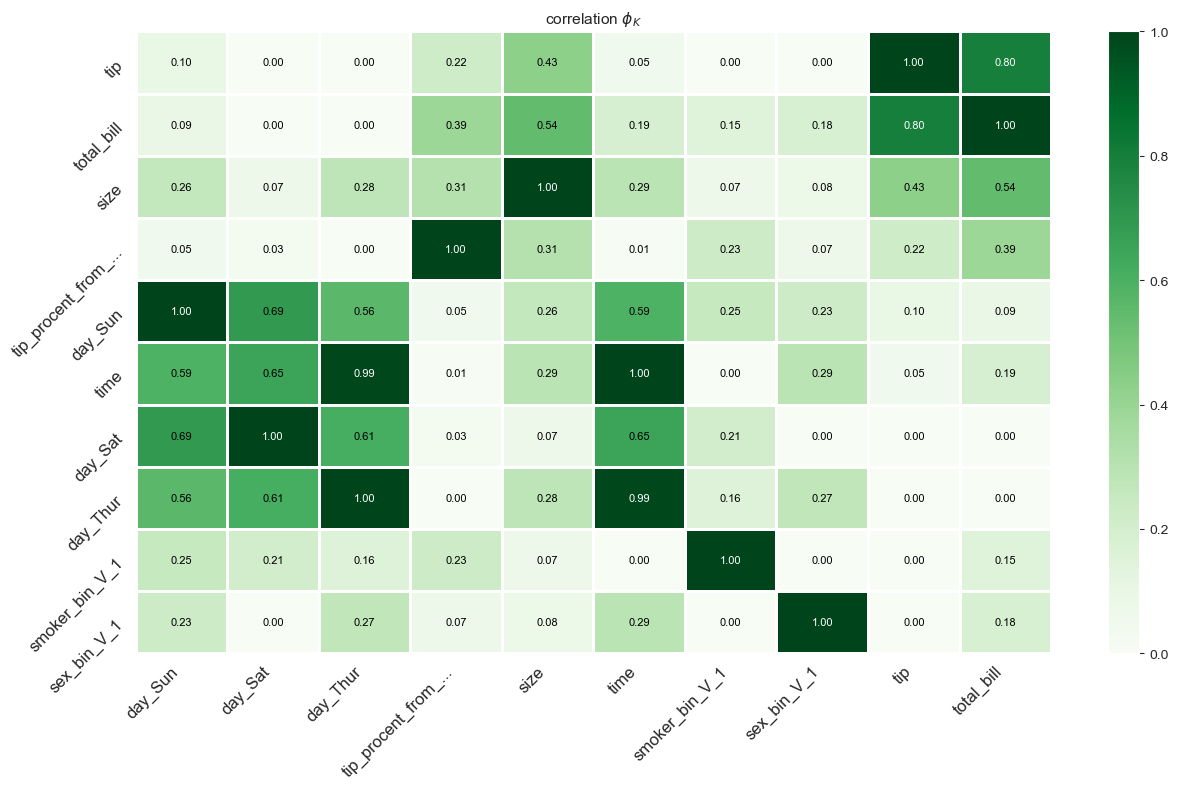

In [122]:
phik_overview = tips_data_df.phik_matrix().round(2).sort_values('tip')

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(13, 8))

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

Пока вывод такой - размер чаевых зависит от суммы счёта и размера компании. Однако то, в когда дают чаевых больше так же зависит от дня недели.
Мужчины дают чаевых больше и немного чаще.